In [112]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from imblearn.over_sampling import RandomOverSampler

np.random.seed(142857)

from itertools import cycle

from IPython.core.pylabtools import figsize
figsize(11, 9)

# Análise Exploratória

In [113]:
raw = pd.read_csv('winequality.csv', sep=';')
raw.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [114]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   object 
 12  quality               6497 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 660.0+ KB


a biblioteca do pandas não conseguiu converter a variável alcohol para float64, é um sinal que tem variáveis com tipos diferentes na coluna.

In [115]:
# antes de preprocessar o texto vou manter uma cópia do original
df = raw.copy()

In [116]:
# cleanup
# força a conversão em numérico e em caso de erro preenche com NaN
df['alcohol'] = pd.to_numeric(df['alcohol'], errors='coerce')
df['alcohol'].describe()

count    6457.000000
mean       10.489083
std         1.192961
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

In [117]:
# nulos após a limpeza
df['alcohol'].isnull().sum()

40

os valores da coluna alcohos estão estranhos.
Mas parece que a informação ainda está ali, pode ser um erro de parser.

In [118]:
# os valores da coluna alcohos estão estranhos
# mas me parece que a informação ainda está ali, pode ser um erro de parser
alcohol_error = raw.loc[df['alcohol'].isnull(), 'alcohol']
alcohol_error

4315    128.933.333.333.333
4319    128.933.333.333.333
4323    114.666.666.666.667
4341    100.333.333.333.333
4353    114.333.333.333.333
4356    105.333.333.333.333
4358    953.333.333.333.333
4364    109.333.333.333.333
4369    109.333.333.333.333
4372    113.666.666.666.667
4377    113.333.333.333.333
4380    110.666.666.666.667
4383    113.333.333.333.333
4403    973.333.333.333.333
4410    973.333.333.333.333
4435    113.333.333.333.333
4507    123.333.333.333.333
4615    112.666.666.666.667
4636    105.666.666.666.667
4637    117.333.333.333.333
4654    109.666.666.666.667
4655    109.666.666.666.667
4656    109.666.666.666.667
4663    101.333.333.333.333
4664    101.333.333.333.333
4671    104.666.666.666.667
4672    104.666.666.666.667
4674    116.333.333.333.333
4734    116.333.333.333.333
4818    131.333.333.333.333
4854    120.666.666.666.667
4864    963.333.333.333.333
4879    953.333.333.333.333
4880    953.333.333.333.333
6257    100.333.333.333.333
6260    100.333.333.

In [119]:
def fix_parser(val):
    head = float(val[:3]) / 10
    if head <= df['alcohol'].max():
        return head
    else:
        return head / 10

alcohol_fixed = alcohol_error.apply(fix_parser)
alcohol_fixed

4315    12.80
4319    12.80
4323    11.40
4341    10.00
4353    11.40
4356    10.50
4358     9.53
4364    10.90
4369    10.90
4372    11.30
4377    11.30
4380    11.00
4383    11.30
4403     9.73
4410     9.73
4435    11.30
4507    12.30
4615    11.20
4636    10.50
4637    11.70
4654    10.90
4655    10.90
4656    10.90
4663    10.10
4664    10.10
4671    10.40
4672    10.40
4674    11.60
4734    11.60
4818    13.10
4854    12.00
4864     9.63
4879     9.53
4880     9.53
6257    10.00
6260    10.00
6337    11.00
6339     9.56
6373    13.50
6412     9.23
Name: alcohol, dtype: float64

In [120]:
# adiciona os valores corrigidos ao dataset
df.loc[alcohol_fixed.index, 'alcohol'] = alcohol_fixed
df['alcohol'].isnull().sum()

0

In [121]:
# check para ver se contém algum outro valor nulo
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [122]:
df.describe(include='all', percentiles=[.01, .25, .50, .75, .90, .99]).round(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.22,0.34,0.32,5.44,0.06,30.53,115.74,1.71,3.22,0.53,10.49,5.82
std,NaN,1.30,0.16,0.15,4.76,0.04,17.75,56.52,7.64,0.16,0.15,1.19,0.87
min,NaN,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00
1%,NaN,5.10,0.12,0.00,0.90,0.02,4.00,11.00,0.99,2.89,0.30,8.70,4.00
25%,NaN,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00
50%,NaN,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00


os valores de densidade também estão estranhos, deveria ser algo entre 0,1 pode ser um erro de parser ou um problemas de conversão de unidades.

In [123]:
df.loc[df['density'] > 1, 'density']

0         1.001
7         1.001
14       10.002
182       1.001
191       1.001
         ...   
5787    100.289
6332    100.369
6333    100.369
6372    100.242
6374    100.242
Name: density, Length: 147, dtype: float64

In [124]:
df['density'] = df['density'].clip(0, 1)
df['density'].describe()

count    6497.000000
mean        0.994669
std         0.002898
min         0.987110
25%         0.992340
50%         0.994890
75%         0.996990
max         1.000000
Name: density, dtype: float64

Nesse contexto os valores extremos (outliers) podem ser de vinhos muito ruins ou muito bons.

In [125]:
df['quality'].value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

In [126]:
# criar uma mascara sobre os outliers
num_variable = [c for c in df.columns if not c in ('type', 'quality')]

outliers = pd.Series([True] * df.shape[0])

for var in num_variable:
    outliers = outliers & df[var].between(df[var].min(), df[var].quantile(.99))
    
print('com outliers:', df.shape[0])
print('sem outliers:', df[outliers].shape[0])
print('outliers:', df[~outliers].shape[0])

com outliers: 6497
sem outliers: 5975
outliers: 522


In [127]:
(df.loc[~outliers, 'quality'].value_counts() / df['quality'].value_counts()).round(3)

3    0.400
4    0.139
5    0.093
6    0.070
7    0.069
8    0.052
9      NaN
Name: quality, dtype: float64

de fato 40% dos vinhos que receberam um score 3 estão com algum parâmetro muito fora do limite da amostra. O que parece caracterizar um vinho ruim. 

In [128]:
# um último ajuste, converter a variável categórica em numérica
df['type'] = df['type'].map({'White': 0, 'Red': 1}).astype(int)

## Avaliar a relação das variáveis independentes com o qualidade do vinho

In [129]:
# propoção de vinhos brancos e tintos
df['type'].value_counts() / df.shape[0]

0    0.753886
1    0.246114
Name: type, dtype: float64

75% da amostra é de vinho branco e 25% vinho tinto

In [130]:
print('score médio para vinhos brancos', round(df.query("type == 0")['quality'].mean(), 2))
df.query("type == 0")['quality'].value_counts() 

score médio para vinhos brancos 5.88


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [131]:
print('score médio para vinhos tintos', round(df.query("type == 1")['quality'].mean(), 2))
df.query("type == 1")['quality'].value_counts()

score médio para vinhos tintos 5.64


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

O pouco que temos de vinhos ótimos (9) são todos brancos. Os vinhos tintos têm um score ligeiramente mais baixo que os vinhos brancos.

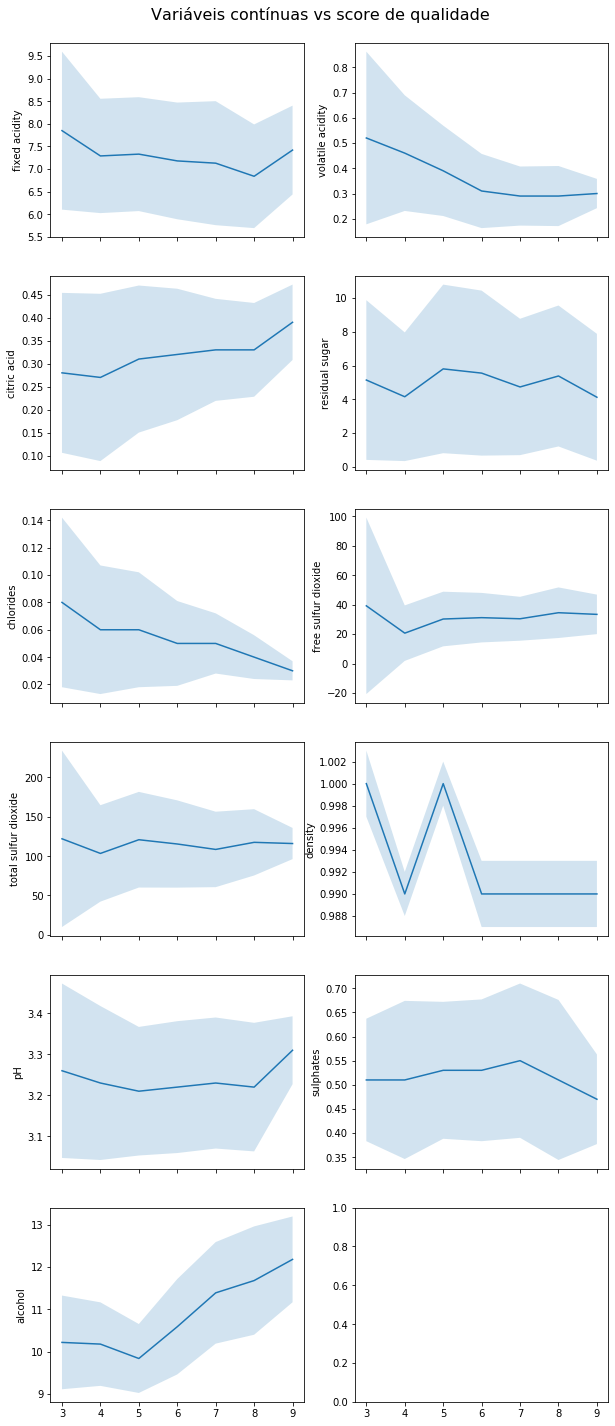

In [132]:
# plota cada variável com relação ao score de qualidade
#stats = df[outliers].groupby('quality')[num_variable].agg(['mean', 'std'])
stats = df.groupby('quality')[num_variable].agg(['mean', 'std'])
x = stats.index

rows = 6
cols = 2
fig, axs = plt.subplots(rows, cols, sharex=True, figsize=(10, 25))

c = 0
for i in range(rows):
    for j in range(cols):
        if c == len(num_variable): break
        
        var = num_variable[c]
        c += 1
        y = stats[(var, 'mean')].round(2)
        std = stats[(var, 'std')].round(3)

        axs[i, j].plot(x, y)
        axs[i, j].fill_between(x, y - std, y + std, alpha=0.2)
        axs[i, j].set_ylabel(var)
        


fig.suptitle('Variáveis contínuas vs score de qualidade', y=0.9, fontsize=16);

In [133]:
corr = df[outliers].corr()
corr['quality'].sort_values()

density                -0.305825
volatile acidity       -0.242696
chlorides              -0.230933
type                   -0.114746
fixed acidity          -0.073851
total sulfur dioxide   -0.033586
residual sugar         -0.028051
pH                      0.022523
sulphates               0.049640
free sulfur dioxide     0.081922
citric acid             0.093300
alcohol                 0.444789
quality                 1.000000
Name: quality, dtype: float64

Variáveis correlacionadas positivamente com qualidade:
* free sulfur dioxide
* pH 
* sulphates
* alcohol
* citric acid

Variáveis correlacionadas negativamente com qualidade:

* fixed acidity
* volatile acidity
* residual sugar
* chloride
* total sulfur dioxide
* density


Pelo análise exploratória, podemos concluir que os vinhos bem avaliados tendem a ter um teor de álcool elevado e uma baixa densidade. 
Outros valores como "volatile acidity", "chlorides" também tem um correlação alta com a qualidade do vinho.

# Modelagem

**output:** score entre 0 and 10 <br>
**tipo:** multiclass classification

In [134]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import sklearn

## Splits

In [135]:
X = df.drop('quality', axis=1)
y = df['quality']

In [136]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, stratify=y, random_state=145827)

In [137]:
y_valid.value_counts()

6    567
5    428
7    216
4     43
8     39
3      6
9      1
Name: quality, dtype: int64

Classes Faltando:
o dataset não tem nenhum vinho com score 1,2,10.

In [138]:
print(y.shape)
print(y_train.shape)
print(y_valid.shape)

(6497,)
(5197,)
(1300,)


Text(0.5, 1.0, 'Distribuição das classes')

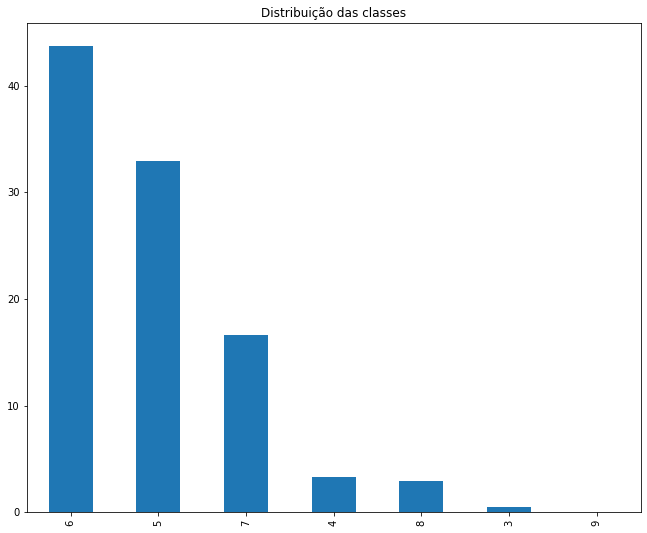

In [139]:
(y_train.value_counts() / y_train.shape[0] * 100).plot(kind='bar')
plt.title('Distribuição das classes')

## Model Selection

In [140]:
results = pd.DataFrame()

In [141]:
scoring='recall_macro'

In [142]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, y_train, cv=3, scoring=scoring)

score = scores.mean()
std = scores.std()

results = results.append({'model': 'RandomForestClassifier', 'cost': score, 'std': std}, ignore_index=True)

In [143]:
lsvc = make_pipeline(StandardScaler(), svm.LinearSVC(max_iter=10000))
scores = cross_val_score(lsvc, X_train, y_train, cv=3, scoring=scoring)

score = scores.mean()
std = scores.std()

results = results.append({'model': 'LinearSVC', 'cost': score, 'std': std}, ignore_index=True)

/home/henrique/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/henrique/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [144]:
svc = make_pipeline(StandardScaler(), svm.SVC())
scores = cross_val_score(svc, X_train, y_train, cv=3, scoring=scoring)

score = scores.mean()
std = scores.std()

results = results.append({'model': 'SVC', 'cost': score, 'std': std}, ignore_index=True)

In [145]:
knc = make_pipeline(StandardScaler(), KNeighborsClassifier())
scores = cross_val_score(knc, X_train, y_train, cv=3, scoring=scoring)

score = scores.mean()
std = scores.std()

results = results.append({'model': 'KNeighborsClassifier', 'cost': score, 'std': std}, ignore_index=True)

In [146]:
results[['model', 'cost', 'std']]

,model,cost,std
0,RandomForestClassifier,0.335448,0.004180
1,LinearSVC,0.197695,0.001692
2,SVC,0.225230,0.003090
3,KNeighborsClassifier,0.259199,0.003003


# Tunning

O default do random forest é overfitar os dados de treinamento

In [147]:
rf_overfit = RandomForestClassifier(random_state=142857)

rf_overfit.fit(X_train, y_train)

scores = cross_val_score(rf_overfit, X_train, y_train, cv=3, scoring=scoring)

score = scores.mean()
std = scores.std()

print("Training set - CV", scoring, round(score, 2), 'std:', round(std, 3))

y_pred = rf_overfit.predict(X_valid)

Training set - CV recall_macro 0.34 std: 0.001


Text(0.5, 1.0, 'Training set - Confusion Matrix - Default')

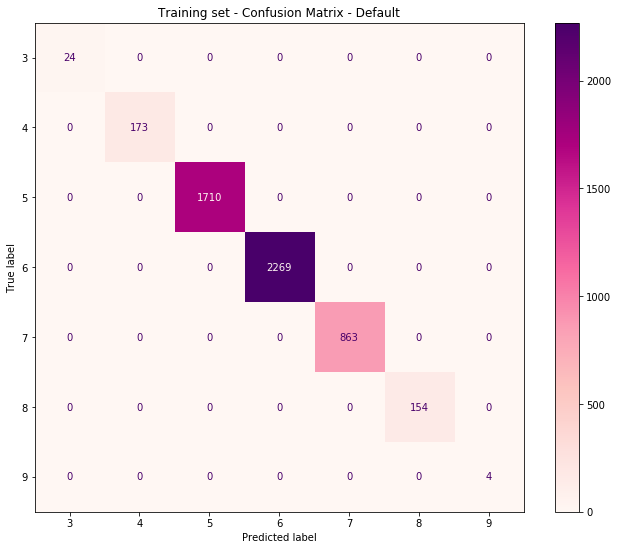

In [148]:
disp = metrics.plot_confusion_matrix(rf_overfit, X_train, y_train, cmap=plt.cm.RdPu, values_format='d')
disp.ax_.set_title('Training set - Confusion Matrix - Default')

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.50      0.05      0.09        43
           5       0.72      0.74      0.73       428
           6       0.65      0.77      0.70       567
           7       0.66      0.52      0.58       216
           8       0.83      0.26      0.39        39
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1300
   macro avg       0.48      0.33      0.36      1300
weighted avg       0.67      0.67      0.66      1300



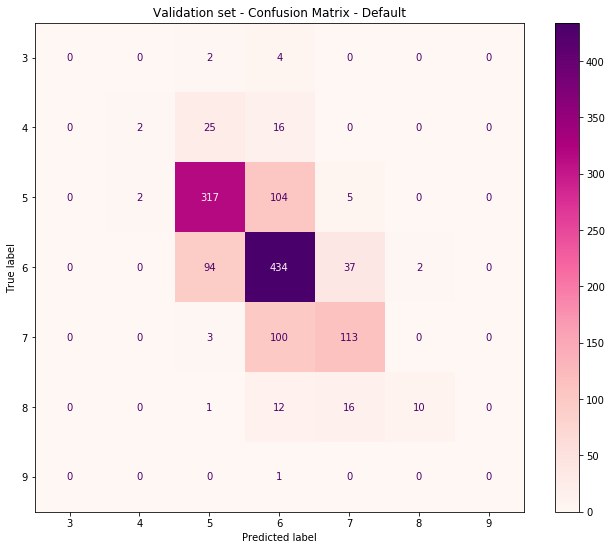

In [149]:
disp = metrics.plot_confusion_matrix(rf_overfit, X_valid, y_valid, cmap=plt.cm.RdPu, values_format='d')
disp.ax_.set_title('Validation set - Confusion Matrix - Default')

print(metrics.classification_report(y_valid, y_pred, zero_division=0))

vamos limitar o tamanho das árvores para ter no mínimo 5 amostras por folha e incluir class_weight='balanced'

In [150]:
rf = RandomForestClassifier(min_samples_leaf=5, class_weight='balanced', random_state=142857)

rf.fit(X_train, y_train)

scores = cross_val_score(rf, X_train, y_train, cv=3, scoring=scoring)

score = scores.mean()
std = scores.std()

print("Training set [class_weight='balanced', min_samples_leaf=5] - CV", scoring, round(score, 2), 'std:', round(std, 3))

y_pred = rf.predict(X_valid)

Training set [class_weight='balanced', min_samples_leaf=5] - CV recall_macro 0.37 std: 0.011


Text(0.5, 1.0, 'Training set - Confusion Matrix - min_samples_leaf=5')

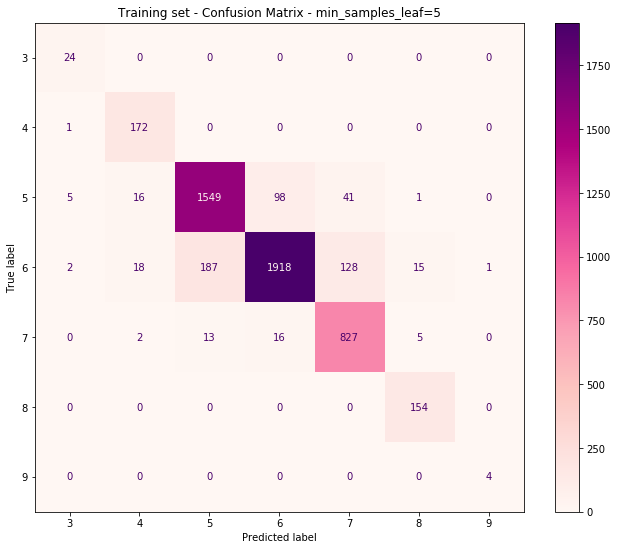

In [151]:
disp = metrics.plot_confusion_matrix(rf, X_train, y_train, cmap=plt.cm.RdPu, values_format='d')
disp.ax_.set_title('Training set - Confusion Matrix - min_samples_leaf=5')

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.34      0.30      0.32        43
           5       0.68      0.72      0.70       428
           6       0.66      0.60      0.63       567
           7       0.53      0.65      0.58       216
           8       0.45      0.26      0.33        39
           9       0.00      0.00      0.00         1

    accuracy                           0.63      1300
   macro avg       0.38      0.36      0.37      1300
weighted avg       0.62      0.63      0.62      1300



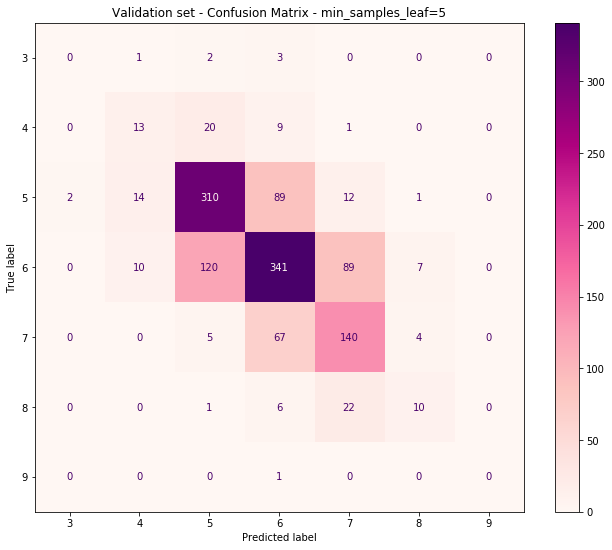

In [152]:
disp = metrics.plot_confusion_matrix(rf, X_valid, y_valid, cmap=plt.cm.RdPu, values_format='d')
disp.ax_.set_title('Validation set - Confusion Matrix - min_samples_leaf=5')

print(metrics.classification_report(y_valid, y_pred, zero_division=0))

Text(0.5, 1.0, 'Features Importances')

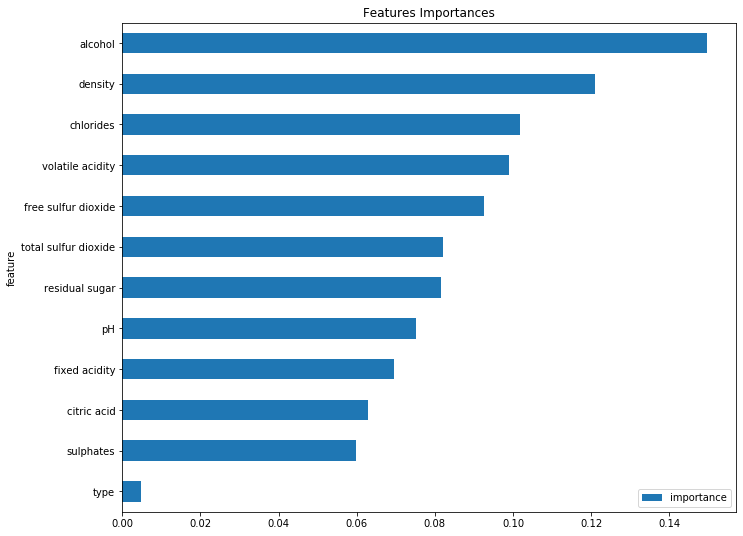

In [153]:
pd.DataFrame(zip(X_valid.columns, rf.feature_importances_), columns=['feature', 'importance']).sort_values(by='importance', ascending=True).plot(kind='barh', x='feature', y='importance')
plt.title('Features Importances')

# Salvando o modelo

In [154]:
from joblib import dump

In [155]:
dump(rf, './model/model.joblib')

['./model/model.joblib']